In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import pandas as pd
import string

## Loading data
Using amazon food reviews data. Extracting just the text column to produce word corpus.

In [2]:
df = pd.read_csv("amazon_food_reviews.csv")
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
df.size

5684540

In [4]:
text_column = df['Text']
text_data = text_column#[:2000000]

In [5]:
print(text_data[:10])

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object


## Prepare data
- Converting text data by removing punctations and other unwanted characters and words
- Tokenize and process each review

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

nltk.download('punkt') 
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/kris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Check if text contains HTML tags
    if '<' in text and '>' in text:
        text = BeautifulSoup(text, "html.parser").get_text()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize into words
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

In [8]:
tokenized_sentences = [preprocess_text(review) for review in text_data]
print(tokenized_sentences[:10])

[['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better'], ['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanutsthe', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo'], ['confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'filberts', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'cs', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'seduces', 'edmund', 'selling', 'brother', 'sisters', 'witch'], ['looking', 'secret', 'ingredient', 'robitussin', 'believe', 'found', 'got', 'addition', 'root', 'beer', 'extract', 'ordered', 'good', 'made', 'cherry', 'soda', '

## Train word2vec model

Parameters of Word2Vec:
- `min_count` - is for pruning the internal dictionary. Words that appear only once or twice in a billion-word corpus are probably uninteresting typos and garbage. In addition, there’s not enough data to make any meaningful training on those words, so it’s best to ignore them
- `vector_size` - is the number of dimensions (N) of the N-dimensional space that gensim Word2Vec maps the words onto. Bigger size values require more training data, but can lead to better (more accurate) models. Reasonable values are in the tens to hundreds
- `workers` - is for training parallelization, to speed up training
- `window` - maximum distance between the current and predicted word within a sentence

In [35]:
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=10, min_count=600, workers=12, epochs=10,sample=1e-5)

## Test model

In [39]:
words = list(model.wv.key_to_index)
print(len(words))
print(words[:100])

3718
['like', 'good', 'one', 'taste', 'great', 'coffee', 'product', 'flavor', 'tea', 'love', 'food', 'would', 'get', 'really', 'dont', 'much', 'also', 'little', 'use', 'time', 'amazon', 'buy', 'tried', 'best', 'even', 'price', 'find', 'im', 'make', 'ive', 'well', 'better', 'try', 'eat', 'dog', 'first', 'water', 'chocolate', 'bag', 'used', 'found', 'sugar', 'cup', 'drink', 'sweet', 'bought', 'made', 'think', 'box', 'way', 'two', 'day', 'tastes', 'since', 'still', 'could', 'go', 'store', 'order', 'know', 'got', 'bit', 'recommend', 'give', 'many', 'nice', 'dogs', 'delicious', 'favorite', 'want', 'cant', 'never', '2', 'flavors', 'every', 'something', 'mix', 'free', 'hot', 'didnt', 'always', 'brand', 'loves', 'without', 'years', 'stuff', 'makes', 'cat', 'treats', 'lot', 'say', 'add', 'right', 'healthy', 'doesnt', 'less', 'chips', 'different', 'quality', 'enough']


In [40]:
vector = model.wv['like']
print(vector)

[ 5.84960841e-02  2.43666396e-02  1.23263612e-01  7.01840460e-01
 -6.00714982e-01  3.58715981e-01  3.57241571e-01 -9.25653204e-02
  6.72542974e-02  1.22444347e-01 -2.30652820e-02  6.24601781e-01
  1.83520377e-01 -2.58669723e-02  2.73325108e-02  1.17763840e-02
  3.89637858e-01 -4.99591649e-01 -7.46161401e-01 -3.58895063e-02
  2.34224603e-01 -7.11236477e-01 -1.79527029e-02 -1.94216609e-01
  3.01095039e-01 -2.67496258e-02 -1.79116443e-01  1.36417270e-01
 -9.66822207e-02  1.84306890e-01  1.35131016e-01  1.33504674e-01
 -1.57544658e-01 -4.75767434e-01  2.05488019e-02  4.49295714e-02
  2.79742517e-02 -2.37948865e-01 -2.08686918e-01  2.12215185e-01
 -3.10507249e-02  7.92227313e-02  5.38104177e-02  2.49312654e-01
 -5.13189852e-01  6.93825245e-01 -4.53054160e-01  5.78946590e-01
  4.16654766e-01  2.07341596e-01  2.35455513e-01  2.53629327e-01
 -2.00808063e-01  1.59840174e-02  5.35435677e-01 -1.22605897e-01
  1.90110177e-01  1.10133909e-01 -5.16050279e-01 -9.55625847e-02
 -5.20660758e-01  3.06411

## Visualize words in space

Extracting word vectors and reducing number of dimensions.

In [41]:
import numpy as np
from sklearn.manifold import TSNE

word_vectors = [model.wv[word] for word in words]

# Convert list of word vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# Using t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors_array)

Visualize 100 words with static matplotlib plot

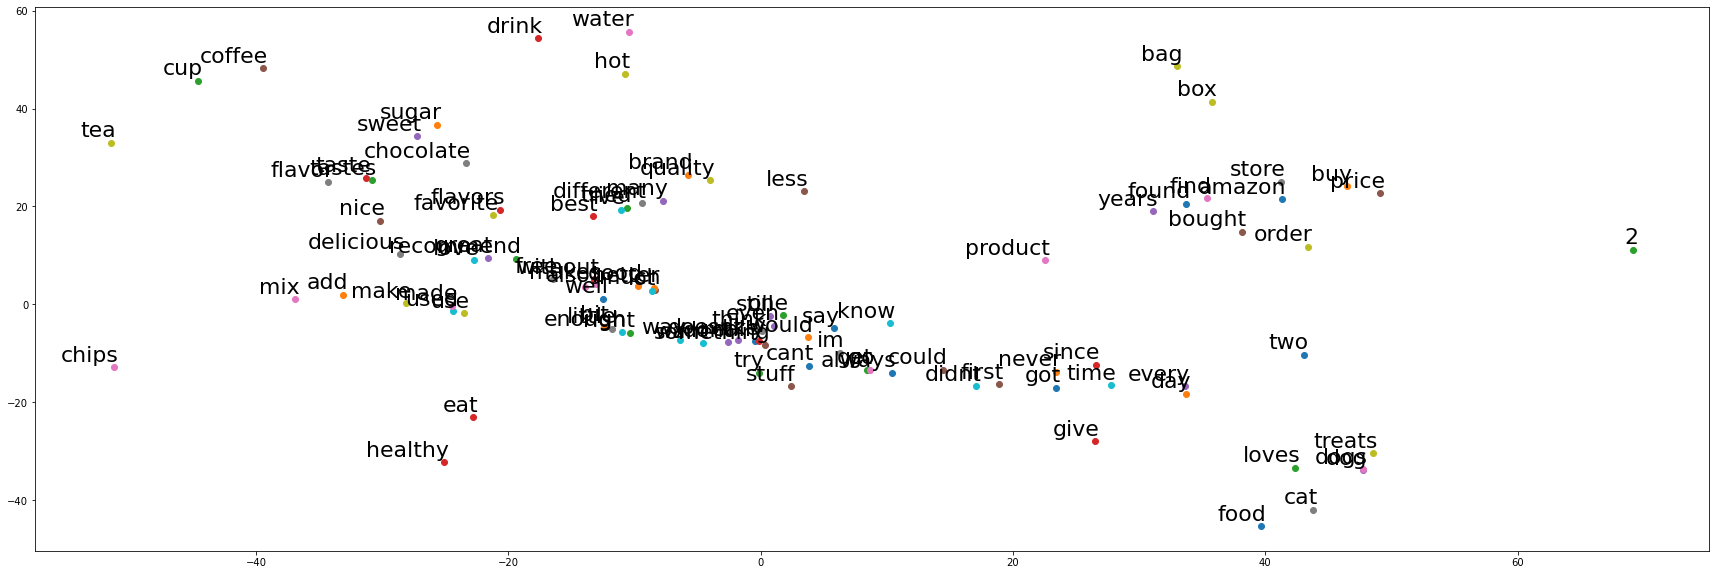

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
for i, word in enumerate(words[:100]):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(
        word, 
        xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), 
        xytext=(5, 2), 
        textcoords='offset points', 
        ha='right', 
        va='bottom', 
        fontsize=22
    ) 

Interactive visualization

In [43]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans

# Assuming 'word_vectors_2d' and 'words' are already defined
visible_words = words  # You can limit the number of words for better performance and clarity

# Apply K-Means clustering
num_clusters = 30  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(word_vectors_2d)

# Create a color map for clusters
colors = px.colors.qualitative.Plotly  # Using Plotly's qualitative colors
cluster_colors = [colors[i % len(colors)] for i in clusters]

# Create a scatter plot
fig = go.Figure(data=[go.Scatter(
    x=[word_vectors_2d[i, 0] for i in range(len(visible_words))],
    y=[word_vectors_2d[i, 1] for i in range(len(visible_words))],
    text=visible_words,
    mode='markers+text',
    textposition='top center',
    marker=dict(color=cluster_colors, size=10, line=dict(color='DarkSlateGrey', width=1))
)])

# Update layout for better readability
fig.update_layout(
    title='Word Vectors 2D Projection',
    xaxis_title='X Coordinate',
    yaxis_title='Y Coordinate',
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue",
    height=1000,
)

# Show plot
fig.show()



/home/kris/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [53]:
print(model.wv.most_similar('tea', topn=5))

[('teas', 0.9005334377288818), ('steeped', 0.8264603018760681), ('teabags', 0.8221346735954285), ('stash', 0.797435462474823), ('oolong', 0.791826069355011)]


In [54]:
print(model.wv.most_similar('coffee', topn=5))

[('coffees', 0.8620740175247192), ('coffe', 0.857521653175354), ('brewed', 0.8383644223213196), ('starbucks', 0.8278254866600037), ('brews', 0.8180325627326965)]


In [55]:
print(model.wv.most_similar('starbucks', topn=5))

[('coffee', 0.8278254270553589), ('coffees', 0.7938326001167297), ('maxwell', 0.7915192246437073), ('folgers', 0.7878457307815552), ('expresso', 0.7849266529083252)]


In [56]:
print(model.wv.most_similar('amazon', topn=5))

[('amazoncom', 0.8507763743400574), ('amazons', 0.7707338929176331), ('locally', 0.7665619850158691), ('retail', 0.7500514388084412), ('online', 0.7488691210746765)]


In [57]:
print(model.wv.most_similar('like', topn=5))

[('weird', 0.7111392617225647), ('sort', 0.6846684813499451), ('really', 0.6550850868225098), ('okay', 0.6281975507736206), ('kinda', 0.6222630143165588)]


In [58]:
print(model.wv.most_similar('day', topn=5))

[('week', 0.7007748484611511), ('night', 0.6759933233261108), ('twice', 0.6616238951683044), ('morning', 0.6516538858413696), ('hours', 0.6353189945220947)]


In [59]:
print(model.wv.similarity('like', 'hate'))

0.53722775


In [60]:
print(model.wv.similarity('man', 'woman'))

0.5360382
